/var/folders/pv/vxz_z6x905j13byjd_vxl_br0000gn/T/ipykernel_57105/930602452.py:42: RuntimeWarning: divide by zero encountered in log
  ax1.plot(data[:, 0], np.log(data[:, 1]), color=color, lw=0.5)


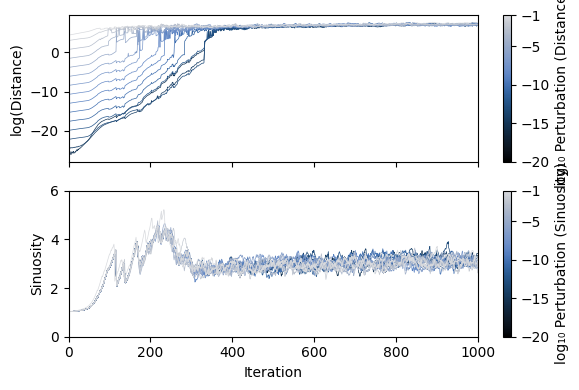

In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import re
import cmcrameri.cm as cmc
import matplotlib.colors as mcolors

# Create a shifted version of the Oslo colormap by sampling from 0 to 0.95
cmap_original = cmc.oslo
shifted_colors = cmap_original(np.linspace(0, 0.90, 256))
shifted_oslo = mcolors.LinearSegmentedColormap.from_list("shifted_oslo", shifted_colors)

# Get all saved files in the directory
file_paths = sorted(glob.glob("/Users/braydennoh/Documents/phasespace/2.18/update/wavelength/t_d_valid_freq_*.txt"))

# Define normalization: perturbation exponents range from -20 to -1
norm = plt.Normalize(vmin=-20, vmax=-1)

# Create figure and subplots
fig, axes = plt.subplots(nrows=2, figsize=(6, 4), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# Top subplot: log(distance) vs. iteration
ax1 = axes[0]
ax2 = axes[1]

for file_path in file_paths:
    match = re.search(r"t_d_valid_freq_([\d\.Ee+-]+)\.txt", file_path)
    if match:
        perturbation_value = float(match.group(1))
        exponent = np.log10(perturbation_value)
        data = np.loadtxt(file_path)

        # Ensure data shape consistency
        if data.ndim == 1 and data.size == 5:
            data = data.reshape(1, 5)
        if data.ndim < 2 or data.shape[1] < 5:
            continue

        color = shifted_oslo(norm(exponent))
        
        # Plot log(distance) on the top subplot
        ax1.plot(data[:, 0], np.log(data[:, 1]), color=color, lw=0.5)

        # Plot sinuosity on the bottom subplot
        ax2.plot(data[:, 0], data[:, 2], color=color, lw=0.5)
        ax2.plot(data[:, 0], data[:, 3], color=color, lw=0.5)

# Colorbars for both subplots
cbar_ticks = [-20, -15, -10, -5, -1]

# Top colorbar (log(Distance))
sm1 = plt.cm.ScalarMappable(cmap=shifted_oslo, norm=norm)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1, orientation="vertical", ticks=cbar_ticks)
cbar1.set_label("log₁₀ Perturbation (Distance)")

# Bottom colorbar (Sinuosity)
sm2 = plt.cm.ScalarMappable(cmap=shifted_oslo, norm=norm)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, orientation="vertical", ticks=cbar_ticks)
cbar2.set_label("log₁₀ Perturbation (Sinuosity)")

# Labels and limits
ax1.set_ylabel("log(Distance)")
ax1.set_xlim([0, 1000])

ax2.set_xlabel("Iteration")
ax2.set_ylabel("Sinuosity")
ax2.set_ylim([0, 6])

plt.tight_layout()
plt.show()
